Nada más comenzar el proyecto, lo primero que debemos haces es importar librerías y descargar el documento que contiene los datos. En este caso es un documento tipo csv. El dataframe original se llama shark_atk y el dataframe sobre el que voy a trabajar durante todo el proyecto se llama shark

In [338]:
# librerias

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import pylab as plt  
import seaborn as sns 

In [339]:
shark_atk = pd.read_csv('src/attacks.csv', encoding='latin1')

In [340]:
shark = shark_atk.copy() 

Comienzo mirando que tenemos, estos son los valores iniciales: (25723, 24)

In [341]:
shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [342]:
shark.shape 

(25723, 24)

In [343]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Para poder realizar una compensión más adecuada de los datos, procedo a cambiarle el nombre a las columnas, comprobando que el número inicial de columnas sigue intacto y finalmente compruebo q se han cambiado según mi nuevo criterio

In [344]:
new_names=['case_number', 'date', 'year', 'shark_attack_type', 'country', 'country_area', 'country_location', 'victim_activity', 'victim_name', 'victim_sex', 'victim_age', 'victim_injury', 'victim_fatality', 'time', 'shark_species', 'invest_src', 'pdf', 'href_form', 'href', 'cn1', 'cn2', 'or', 'un1', 'un2']
shark.columns=new_names


In [345]:
len(shark.columns)

24

In [346]:
shark.head()

,case_number,date,year,shark_attack_type,country,country_area,country_location,victim_activity,victim_name,victim_sex,victim_age,victim_injury,victim_fatality,time,shark_species,invest_src,pdf,href_form,href,cn1,cn2,or,un1,un2
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


El siguiente paso es ordenar los nombres de las columnas de manera que parezca más lógico y fácil entender la relacción entre los valores, de un primer vistazo. También vuelvo a comprobar que se encuentran en el nuevo orden esperado

In [347]:
new_col_order = ['case_number', 'date', 'year', 'time', 'country', 'country_area', 'country_location', 'shark_species', 'shark_attack_type', 'victim_activity', 'victim_injury', 'victim_fatality', 'victim_name', 'victim_sex', 'victim_age', 'invest_src', 'pdf', 'href_form', 'href', 'cn1', 'cn2', 'or', 'un1', 'un2']
shark = shark[new_col_order]


In [348]:
shark.columns

Index(['case_number', 'date', 'year', 'time', 'country', 'country_area',
       'country_location', 'shark_species', 'shark_attack_type',
       'victim_activity', 'victim_injury', 'victim_fatality', 'victim_name',
       'victim_sex', 'victim_age', 'invest_src', 'pdf', 'href_form', 'href',
       'cn1', 'cn2', 'or', 'un1', 'un2'],
      dtype='object')

In [349]:
shark.head()

,case_number,date,year,time,country,country_area,country_location,shark_species,shark_attack_type,victim_activity,victim_injury,victim_fatality,victim_name,victim_sex,victim_age,invest_src,pdf,href_form,href,cn1,cn2,or,un1,un2
0,2018.06.25,25-Jun-2018,2018.0,18h00,USA,California,"Oceanside, San Diego County",White shark,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N,Julie Wolfe,F,57,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,14h00 -15h00,USA,Georgia,"St. Simon Island, Glynn County",NaN,Unprovoked,Standing,Minor injury to left thigh,N,Adyson McNeely,F,11,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,07h45,USA,Hawaii,"Habush, Oahu",NaN,Invalid,Surfing,Injury to left lower leg from surfboard skeg,N,John Denges,M,48,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,NaN,AUSTRALIA,New South Wales,Arrawarra Headland,2 m shark,Unprovoked,Surfing,Minor injury to lower leg,N,male,M,NaN,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,NaN,MEXICO,Colima,La Ticla,"Tiger shark, 3m",Provoked,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Gustavo Ramos,M,NaN,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


Ahora exploro las columnas con valores nulos, en este caso decido quitar los nulos después de quitar los duplicados

In [350]:
nan_cols = shark.isna().sum().sort_values(ascending=False)

nan_cols[nan_cols>0]

un1                  25722
un2                  25721
time                 22775
shark_species        22259
victim_age           22252
victim_sex           19986
victim_activity      19965
country_location     19961
victim_fatality      19960
country_area         19876
victim_name          19631
country              19471
victim_injury        19449
invest_src           19438
shark_attack_type    19425
year                 19423
href_form            19422
date                 19421
pdf                  19421
href                 19421
cn1                  19421
cn2                  19421
or                   19414
case_number          17021
dtype: int64

Compruebo si hay duplicados y procedo a quitarlos. Las filas bajan de 25723 a 6312. Y acabo llamando al dataframe como al principio: shark

In [351]:
shark.duplicated().any() 

True

In [352]:
shark_notdupli = shark.drop_duplicates(keep='first') 
shark_notdupli 

,case_number,date,year,time,country,country_area,country_location,shark_species,shark_attack_type,victim_activity,victim_injury,victim_fatality,victim_name,victim_sex,victim_age,invest_src,pdf,href_form,href,cn1,cn2,or,un1,un2
0,2018.06.25,25-Jun-2018,2018.0,18h00,USA,California,"Oceanside, San Diego County",White shark,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N,Julie Wolfe,F,57,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,14h00 -15h00,USA,Georgia,"St. Simon Island, Glynn County",NaN,Unprovoked,Standing,Minor injury to left thigh,N,Adyson McNeely,F,11,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,07h45,USA,Hawaii,"Habush, Oahu",NaN,Invalid,Surfing,Injury to left lower leg from surfboard skeg,N,John Denges,M,48,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,NaN,AUSTRALIA,New South Wales,Arrawarra Headland,2 m shark,Unprovoked,Surfing,Minor injury to lower leg,N,male,M,NaN,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,NaN,MEXICO,Colima,La Ticla,"Tiger shark, 3m",Provoked,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Gustavo Ramos,M,NaN,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [353]:
shark = shark_notdupli 
shark

,case_number,date,year,time,country,country_area,country_location,shark_species,shark_attack_type,victim_activity,victim_injury,victim_fatality,victim_name,victim_sex,victim_age,invest_src,pdf,href_form,href,cn1,cn2,or,un1,un2
0,2018.06.25,25-Jun-2018,2018.0,18h00,USA,California,"Oceanside, San Diego County",White shark,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N,Julie Wolfe,F,57,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,14h00 -15h00,USA,Georgia,"St. Simon Island, Glynn County",NaN,Unprovoked,Standing,Minor injury to left thigh,N,Adyson McNeely,F,11,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,07h45,USA,Hawaii,"Habush, Oahu",NaN,Invalid,Surfing,Injury to left lower leg from surfboard skeg,N,John Denges,M,48,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,NaN,AUSTRALIA,New South Wales,Arrawarra Headland,2 m shark,Unprovoked,Surfing,Minor injury to lower leg,N,male,M,NaN,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,NaN,MEXICO,Colima,La Ticla,"Tiger shark, 3m",Provoked,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Gustavo Ramos,M,NaN,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A partir de este momento comienzo a investigar los valores nulos. Primero, calculo la proporción de nulos por fila. Luego elimino las filas que tienen más del 15% de sus valores nulos. Finalmente igualo la variable para que shark siga teniendo poco a poco menos filas, 2938 ahora. Relleno los valores nulos por columna por ahora con unknown, por si a futuro alguna columna me interesase más poner 0 en vez de unknown. Y compruebo que ya no tengo nulos, porque los he cambiado a unknown

In [354]:
null_ratio = shark.isnull().sum(axis=1) / len(shark.columns)
null_ratio


0        0.083333
1        0.125000
2        0.125000
3        0.166667
4        0.166667
           ...   
6307     0.916667
6308     0.916667
6309     0.958333
8702     1.000000
25722    0.958333
Length: 6312, dtype: float64

In [355]:
limit = 0.15 
filtered_shark = shark[null_ratio <= limit]
filtered_shark

,case_number,date,year,time,country,country_area,country_location,shark_species,shark_attack_type,victim_activity,victim_injury,victim_fatality,victim_name,victim_sex,victim_age,invest_src,pdf,href_form,href,cn1,cn2,or,un1,un2
0,2018.06.25,25-Jun-2018,2018.0,18h00,USA,California,"Oceanside, San Diego County",White shark,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N,Julie Wolfe,F,57,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,14h00 -15h00,USA,Georgia,"St. Simon Island, Glynn County",NaN,Unprovoked,Standing,Minor injury to left thigh,N,Adyson McNeely,F,11,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,07h45,USA,Hawaii,"Habush, Oahu",NaN,Invalid,Surfing,Injury to left lower leg from surfboard skeg,N,John Denges,M,48,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Late afternoon,BRAZIL,Pernambuco,"Piedade Beach, Recife",Tiger shark,Unprovoked,Swimming,FATAL,Y,Jose Ernesto da Silva,M,18,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,NaN,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County","Lemon shark, 3'",Unprovoked,Fishing,Minor injury to foot. PROVOKED INCIDENT,N,male,M,52,"K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,ND.0068,Before 1962,0.0,NaN,MOZAMBIQUE,Maputo Province,Santa Maria Peninsula,"""A pack of sharks""",Unprovoked,Skindiving,Bumped by sharks,N,Les Bishop,M,36,L. Bishop; V.M. Coppleson (1962),ND-0068-LesBishop.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0068,ND.0068,64.0,NaN,NaN
6241,ND.0065,1960s,0.0,Afternoon,IRAQ,Basrah,Shatt-al-Arab River,NaN,Unprovoked,Fishing from a small boat & put his hand in th...,Right hand severed,N,male,M,25,B.W. Coad & L.A.J. Al-Hassan,ND-0065-deadfish.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0065,ND.0065,62.0,NaN,NaN
6242,ND.0064,1960s,0.0,Afternoon,IRAQ,Basrah,Shatt-al-Arab River,Bull shark,Unprovoked,Swimming naked near a date palm where many dat...,Arm severed,N,male,M,6,B.W. Coad & L.A.J. Al-Hassan,ND-0064-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0064,ND.0064,61.0,NaN,NaN
6243,ND.0063,1960s,0.0,Afternoon,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Bull shark,Unprovoked,Swimming in section of river used for washing ...,Right leg lacerated & surgically amputated,N,male,M,16,B.W. Coad & L.A.J. Al-Hassan,ND-0063-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0063,ND.0063,60.0,NaN,NaN


In [356]:
shark = filtered_shark 
shark

,case_number,date,year,time,country,country_area,country_location,shark_species,shark_attack_type,victim_activity,victim_injury,victim_fatality,victim_name,victim_sex,victim_age,invest_src,pdf,href_form,href,cn1,cn2,or,un1,un2
0,2018.06.25,25-Jun-2018,2018.0,18h00,USA,California,"Oceanside, San Diego County",White shark,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N,Julie Wolfe,F,57,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,14h00 -15h00,USA,Georgia,"St. Simon Island, Glynn County",NaN,Unprovoked,Standing,Minor injury to left thigh,N,Adyson McNeely,F,11,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,07h45,USA,Hawaii,"Habush, Oahu",NaN,Invalid,Surfing,Injury to left lower leg from surfboard skeg,N,John Denges,M,48,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Late afternoon,BRAZIL,Pernambuco,"Piedade Beach, Recife",Tiger shark,Unprovoked,Swimming,FATAL,Y,Jose Ernesto da Silva,M,18,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,NaN,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County","Lemon shark, 3'",Unprovoked,Fishing,Minor injury to foot. PROVOKED INCIDENT,N,male,M,52,"K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,ND.0068,Before 1962,0.0,NaN,MOZAMBIQUE,Maputo Province,Santa Maria Peninsula,"""A pack of sharks""",Unprovoked,Skindiving,Bumped by sharks,N,Les Bishop,M,36,L. Bishop; V.M. Coppleson (1962),ND-0068-LesBishop.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0068,ND.0068,64.0,NaN,NaN
6241,ND.0065,1960s,0.0,Afternoon,IRAQ,Basrah,Shatt-al-Arab River,NaN,Unprovoked,Fishing from a small boat & put his hand in th...,Right hand severed,N,male,M,25,B.W. Coad & L.A.J. Al-Hassan,ND-0065-deadfish.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0065,ND.0065,62.0,NaN,NaN
6242,ND.0064,1960s,0.0,Afternoon,IRAQ,Basrah,Shatt-al-Arab River,Bull shark,Unprovoked,Swimming naked near a date palm where many dat...,Arm severed,N,male,M,6,B.W. Coad & L.A.J. Al-Hassan,ND-0064-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0064,ND.0064,61.0,NaN,NaN
6243,ND.0063,1960s,0.0,Afternoon,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Bull shark,Unprovoked,Swimming in section of river used for washing ...,Right leg lacerated & surgically amputated,N,male,M,16,B.W. Coad & L.A.J. Al-Hassan,ND-0063-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0063,ND.0063,60.0,NaN,NaN


In [357]:
columns_to_fill = ['case_number', 'date', 'year', 'time', 'country', 'country_area', 'country_location', 'shark_species', 'shark_attack_type', 'victim_activity', 'victim_injury', 'victim_fatality', 'victim_name', 'victim_sex', 'victim_age', 'invest_src', 'pdf', 'href_form', 'href', 'cn1', 'cn2', 'or', 'un1', 'un2']
shark[columns_to_fill] = shark[columns_to_fill].fillna("unknown") 

In [358]:
nan_cols2 = shark.isna().sum().sort_values(ascending=False)

nan_cols2[nan_cols>0]

case_number          0
date                 0
un1                  0
or                   0
cn2                  0
cn1                  0
href                 0
href_form            0
pdf                  0
invest_src           0
victim_age           0
victim_sex           0
victim_name          0
victim_fatality      0
victim_injury        0
victim_activity      0
shark_attack_type    0
shark_species        0
country_location     0
country_area         0
country              0
time                 0
year                 0
un2                  0
dtype: int64

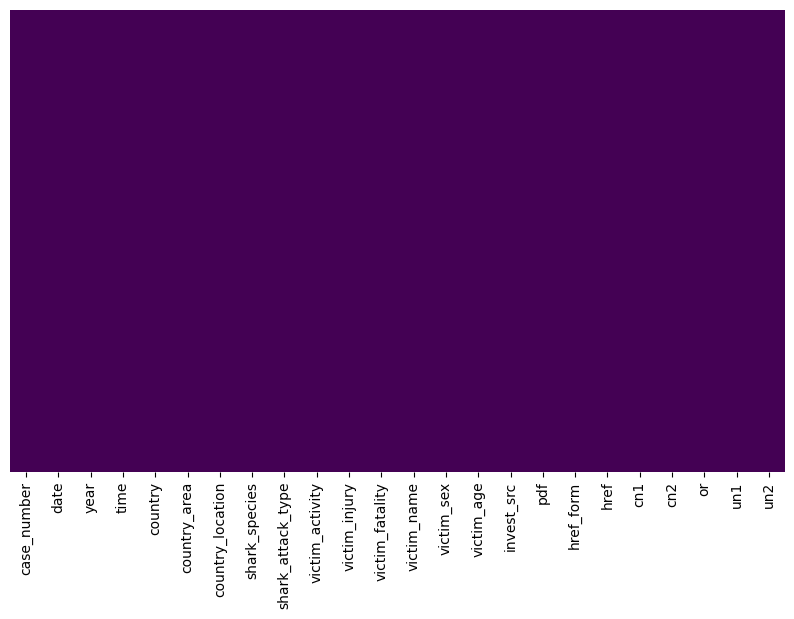

In [359]:
plt.figure(figsize=(10, 6)) 

sns.heatmap(shark.isna(),      
            yticklabels=False, 
            cmap='viridis',      
            cbar=False           
           )

plt.show()

A partir de aqui tengo que ir filtrando por cada columna de las que me interesan. En primer lugar comienzo modificando la columna 'victim_fatality' a la cual le aplico un mapeado y me quedo con 3 valores ['N', 'Y', 'UNKNOWN']

In [360]:
shark['victim_fatality'].unique() 

array(['N', 'Y', 'unknown', 'M', '2017', 'UNKNOWN', ' N'], dtype=object)

In [361]:
mapping = {
    'M': 'N',
    ' N': 'N',
    '2017': 'UNKNOWN',
    'unknown': 'UNKNOWN'
}

shark['victim_fatality'] = shark['victim_fatality'].replace(mapping)
print(shark)

       case_number         date    year            time     country  \
0       2018.06.25  25-Jun-2018  2018.0           18h00         USA   
1       2018.06.18  18-Jun-2018  2018.0   14h00  -15h00         USA   
2       2018.06.09  09-Jun-2018  2018.0           07h45         USA   
6     2018.06.03.a  03-Jun-2018  2018.0  Late afternoon      BRAZIL   
7       2018.05.27  27-May-2018  2018.0         unknown         USA   
...            ...          ...     ...             ...         ...   
6239       ND.0068  Before 1962     0.0         unknown  MOZAMBIQUE   
6241       ND.0065        1960s     0.0       Afternoon        IRAQ   
6242       ND.0064        1960s     0.0       Afternoon        IRAQ   
6243       ND.0063        1960s     0.0       Afternoon        IRAQ   
6265       ND.0038    1941-1942     0.0       Afternoon        IRAQ   

         country_area                                   country_location  \
0          California                        Oceanside, San Diego Count

In [362]:
shark['victim_fatality'].unique()

array(['N', 'Y', 'UNKNOWN'], dtype=object)

Ahora realizo la siguiente conversión. En este caso reviso la columna 'country'

In [363]:
shark.country.unique() #aqui observo la cantidad de paises unicos


array(['USA', 'BRAZIL', 'AUSTRALIA', 'ENGLAND', 'COSTA RICA', 'MALDIVES',
       'SOUTH AFRICA', 'THAILAND', 'BAHAMAS', 'ECUADOR', 'NEW CALEDONIA',
       'MALAYSIA', 'CUBA', 'NEW ZEALAND', 'SPAIN', 'JAPAN', 'EGYPT',
       'ST HELENA, British overseas territory', 'MEXICO', 'REUNION',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'PHILIPPINES',
       'INDONESIA', 'COLUMBIA', 'FRENCH POLYNESIA', 'MOZAMBIQUE',
       'FRANCE', 'ISRAEL', 'JAMAICA', 'TONGA', 'SCOTLAND', 'ITALY',
       'TAIWAN', 'PAPUA NEW GUINEA', 'RUSSIA', 'SEYCHELLES',
       'TURKS & CAICOS', 'FIJI', 'SOUTH KOREA', 'VIETNAM', 'MADAGASCAR',
       'GUAM', 'UNITED ARAB EMIRATES (UAE)', 'PANAMA', 'CROATIA',
       'SOLOMON ISLANDS', 'NORWAY', 'ST. MAARTIN', 'GRAND CAYMAN',
       'CHINA', 'VANUATU', 'URUGUAY', 'VENEZUELA', 'INDIA', 'MICRONESIA',
       'CANADA', 'OKINAWA', ' TONGA', 'MARSHALL ISLANDS', 'MAURITIUS',
       'SENEGAL', 'EGYPT / ISRAEL', 'HONG KONG', 'CHILE', 'KENYA',
       'PORTUGAL', 'WESTERN SAMOA', '

In [364]:
shark.country.value_counts()

country
USA                   1383
AUSTRALIA              636
SOUTH AFRICA           354
BAHAMAS                 49
NEW ZEALAND             47
                      ... 
MALAYSIA                 1
GRAND CAYMAN             1
NEW GUINEA               1
DOMINICAN REPUBLIC       1
BARBADOS                 1
Name: count, Length: 103, dtype: int64

In [365]:
corrections = {
    'COLUMBIA': 'COLOMBIA',
    'CHINA': 'CHINA',
    'EGYPT / ISRAEL': 'EGYPT / ISRAEL',
    'HONG KONG': 'HONG KONG',
    'NEW GUINEA': 'NEW GUINEA',
    'DOMINICAN REPUBLIC': 'DOMINICAN REPUBLIC',
    'FEDERATED STATES OF MICRONESIA': 'MICRONESIA',
    'MID ATLANTIC OCEAN': 'ATLANTIC OCEAN',
    'NORTH PACIFIC OCEAN': 'PACIFIC OCEAN',
    'NORTH SEA': 'NORTH SEA',
    'NICARAGUA': 'NICARAGUA',
    'EGYPT': 'EGYPT'
}

shark['country'] = shark['country'].replace(corrections)
unique_countries = shark['country'].unique()
print(unique_countries)

['USA' 'BRAZIL' 'AUSTRALIA' 'ENGLAND' 'COSTA RICA' 'MALDIVES'
 'SOUTH AFRICA' 'THAILAND' 'BAHAMAS' 'ECUADOR' 'NEW CALEDONIA' 'MALAYSIA'
 'CUBA' 'NEW ZEALAND' 'SPAIN' 'JAPAN' 'EGYPT'
 'ST HELENA, British overseas territory' 'MEXICO' 'REUNION'
 'UNITED KINGDOM' 'UNITED ARAB EMIRATES' 'PHILIPPINES' 'INDONESIA'
 'COLOMBIA' 'FRENCH POLYNESIA' 'MOZAMBIQUE' 'FRANCE' 'ISRAEL' 'JAMAICA'
 'TONGA' 'SCOTLAND' 'ITALY' 'TAIWAN' 'PAPUA NEW GUINEA' 'RUSSIA'
 'SEYCHELLES' 'TURKS & CAICOS' 'FIJI' 'SOUTH KOREA' 'VIETNAM' 'MADAGASCAR'
 'GUAM' 'UNITED ARAB EMIRATES (UAE)' 'PANAMA' 'CROATIA' 'SOLOMON ISLANDS'
 'NORWAY' 'ST. MAARTIN' 'GRAND CAYMAN' 'CHINA' 'VANUATU' 'URUGUAY'
 'VENEZUELA' 'INDIA' 'MICRONESIA' 'CANADA' 'OKINAWA' ' TONGA'
 'MARSHALL ISLANDS' 'MAURITIUS' 'SENEGAL' 'EGYPT / ISRAEL' 'HONG KONG'
 'CHILE' 'KENYA' 'PORTUGAL' 'WESTERN SAMOA' 'BRITISH ISLES' 'PALAU'
 'GRENADA' 'IRAQ' 'BERMUDA' 'TURKEY' 'NEW BRITAIN' 'PACIFIC OCEAN '
 'NEW GUINEA' 'DOMINICAN REPUBLIC' 'GREECE' 'BRITISH WEST INDIES'
 'A

Ahora voy a revisar la columna 'year'. Realizando un drop me acabo quedando con 2931 filas

In [366]:
shark.year.unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1947.,
       1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938.,
       1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929.,
       1928., 1927., 1926., 1925., 1924., 1922., 1921., 1920., 1919.,
       1918., 1916., 1914., 1912., 1911., 1910., 1907., 1906., 1905.,
       1902., 1901., 1899., 1898., 1897., 1896., 1895., 1894., 1892.,
       1889., 1888., 1887., 1883., 1880., 1879., 1878., 1877., 1874.,
       1871., 1868.,

In [367]:
shark.drop(shark[shark['year'] == 0].index, inplace=True)

In [368]:
shark.shape

(2931, 24)

Finalmente realizo un cambio en la columna shark_attack_type utilizando un metodo lambda

In [369]:
shark.shark_attack_type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Boat', 'Sea Disaster'], dtype=object)

In [370]:
shark.shark_attack_type.value_counts()

shark_attack_type
Unprovoked      2508
Provoked         246
Invalid           99
Boating           46
Sea Disaster      21
Boat               9
Questionable       2
Name: count, dtype: int64

In [371]:
shark['shark_attack_type'] = shark['shark_attack_type'].apply(lambda x: 'Boating' if x == 'Boat' else x)

In [372]:
shark.shark_attack_type.value_counts()

shark_attack_type
Unprovoked      2508
Provoked         246
Invalid           99
Boating           55
Sea Disaster      21
Questionable       2
Name: count, dtype: int64

In [373]:
shark.shape #comprobamos que seguimos teniendo las filas aproximadas al limite ;)

(2931, 24)

De aqui en adelante realizo un pequeño análisis

In [374]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2931 entries, 0 to 6160
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   case_number        2931 non-null   object 
 1   date               2931 non-null   object 
 2   year               2931 non-null   float64
 3   time               2931 non-null   object 
 4   country            2931 non-null   object 
 5   country_area       2931 non-null   object 
 6   country_location   2931 non-null   object 
 7   shark_species      2931 non-null   object 
 8   shark_attack_type  2931 non-null   object 
 9   victim_activity    2931 non-null   object 
 10  victim_injury      2931 non-null   object 
 11  victim_fatality    2931 non-null   object 
 12  victim_name        2931 non-null   object 
 13  victim_sex         2931 non-null   object 
 14  victim_age         2931 non-null   object 
 15  invest_src         2931 non-null   object 
 16  pdf                2931 non-n

In [375]:
shark['year'] = shark['year'].astype(int) # como he visto antes la columna year tenia valores float (decimales) y lo he cambiado a enteros
shark.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2931 entries, 0 to 6160
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   case_number        2931 non-null   object 
 1   date               2931 non-null   object 
 2   year               2931 non-null   int32  
 3   time               2931 non-null   object 
 4   country            2931 non-null   object 
 5   country_area       2931 non-null   object 
 6   country_location   2931 non-null   object 
 7   shark_species      2931 non-null   object 
 8   shark_attack_type  2931 non-null   object 
 9   victim_activity    2931 non-null   object 
 10  victim_injury      2931 non-null   object 
 11  victim_fatality    2931 non-null   object 
 12  victim_name        2931 non-null   object 
 13  victim_sex         2931 non-null   object 
 14  victim_age         2931 non-null   object 
 15  invest_src         2931 non-null   object 
 16  pdf                2931 non-n

In [392]:
analysis = ['victim_fatality', 'country', 'year', 'shark_attack_type']
comparative_table = shark[analysis]
comparative_table = comparative_table.groupby(analysis).size().reset_index(name='counts')
comparative_table

,victim_fatality,country,year,shark_attack_type,counts
0,N,TONGA,2000,Unprovoked,1
1,N,ARGENTINA,1954,Unprovoked,1
2,N,ATLANTIC OCEAN,1961,Unprovoked,1
3,N,AUSTRALIA,1871,Unprovoked,1
4,N,AUSTRALIA,1877,Unprovoked,1
...,...,...,...,...,...
1096,Y,USA,2015,Unprovoked,1
1097,Y,VANUATU,1987,Unprovoked,1
1098,Y,VANUATU,2005,Unprovoked,1
1099,Y,WESTERN SAMOA,1972,Unprovoked,1


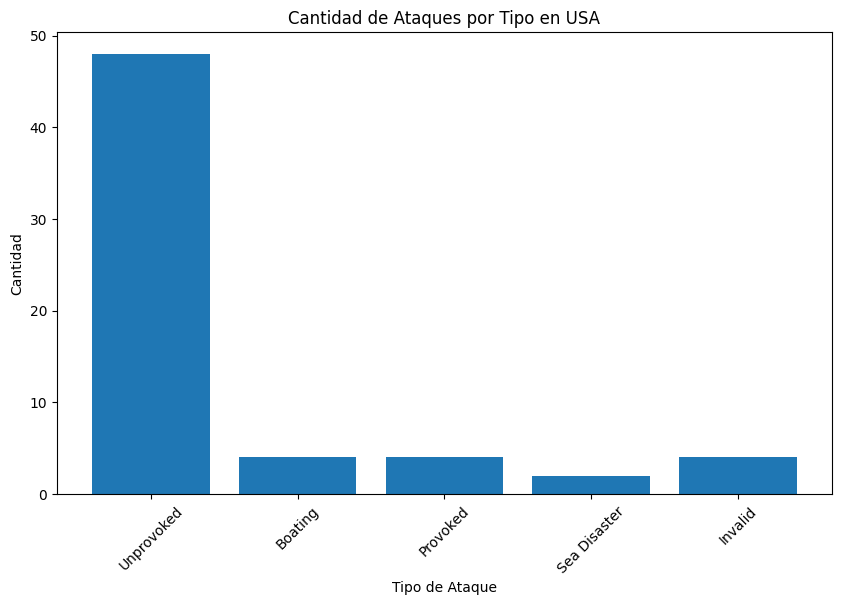

In [393]:
import matplotlib.pyplot as plt

country_filter = comparative_table['country'] == 'USA'
usa_attacks = comparative_table[country_filter]

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(usa_attacks['shark_attack_type'], usa_attacks['counts'])
plt.xlabel('Tipo de Ataque')
plt.ylabel('Cantidad')
plt.title('Cantidad de Ataques por Tipo en USA')
plt.xticks(rotation=45)
plt.show()

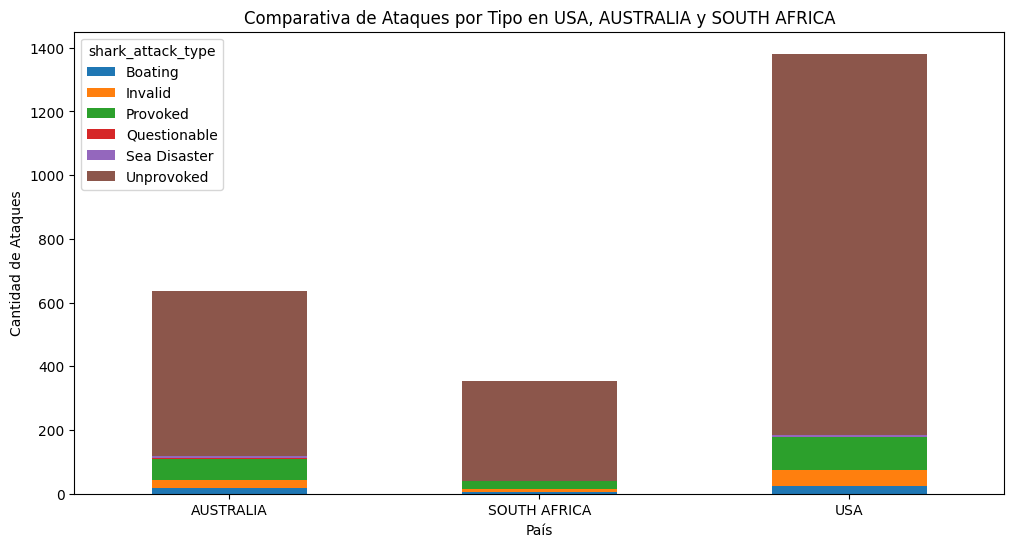

In [399]:
selected_columns1 = ['country', 'shark_attack_type']

countries_top3 = ['USA', 'AUSTRALIA', 'SOUTH AFRICA']
filtered_df = shark[shark['country'].isin(countries_top3)]

# Creamos una tabla de contingencia entre los países y los tipos de ataque
cross_table = pd.crosstab(filtered_df['country'], filtered_df['shark_attack_type'])

# Creamos un gráfico de barras apiladas
cross_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('País')
plt.ylabel('Cantidad de Ataques')
plt.title('Comparativa de Ataques por Tipo en USA, AUSTRALIA y SOUTH AFRICA')
plt.xticks(rotation=0)  # Puedes ajustar la rotación de las etiquetas del eje x
plt.show()

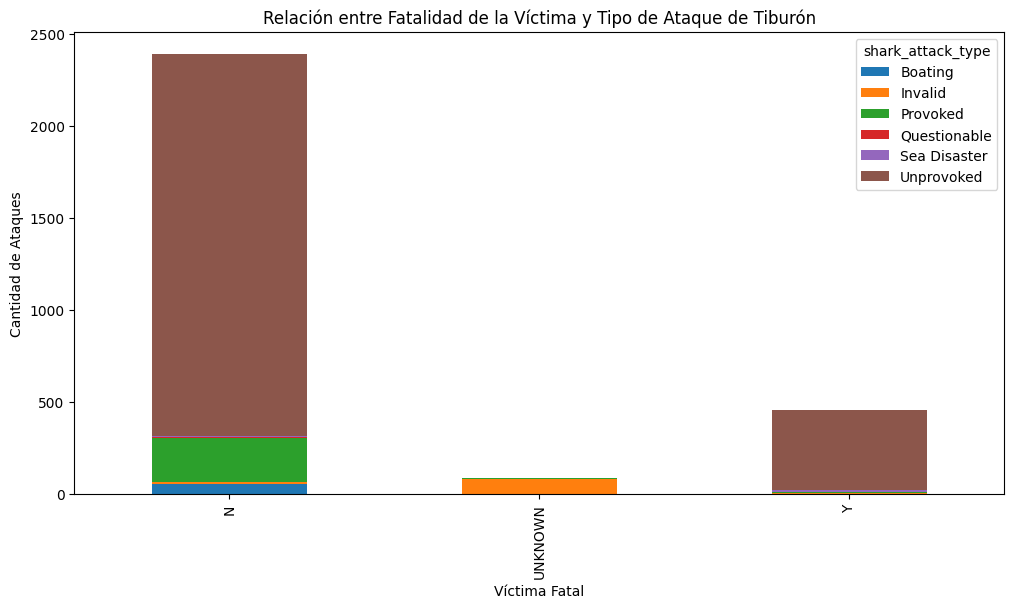

In [396]:
selected_columns2 = ['victim_fatality', 'shark_attack_type']

cross_table = pd.crosstab(shark['victim_fatality'], shark['shark_attack_type'])

cross_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Víctima Fatal')
plt.ylabel('Cantidad de Ataques')
plt.title('Relación entre Fatalidad de la Víctima y Tipo de Ataque de Tiburón')
plt.show()

A partir de aqui en adelante fue ir probando y viendo los datos en general

In [376]:
shark.groupby('country').count()[['case_number']].sort_values(by='case_number', ascending=False).head() # aqui los agrupo por pais y ordeno los casos ocurridos por pais de manera descendente. En USA es donde mas ataques hubo

,case_number
country,
USA,1381
AUSTRALIA,636
SOUTH AFRICA,354
BAHAMAS,49
NEW ZEALAND,47


hola

In [377]:
shark.describe(include='object').T 

,count,unique,top,freq
case_number,2931,2927,2006.09.02,2
date,2931,2629,20-Sep-2015,4
time,2931,325,unknown,437
country,2931,101,USA,1381
country_area,2931,349,Florida,729
country_location,2931,2134,"New Smyrna Beach, Volusia County",147
shark_species,2931,1149,unknown,719
shark_attack_type,2931,6,Unprovoked,2508
victim_activity,2931,604,Surfing,745
victim_injury,2931,1957,FATAL,204


In [378]:
subset1 = shark[['victim_activity', 'victim_injury', 'victim_fatality', 'victim_name', 'victim_sex', 'victim_age']] #For object data (e.g. strings), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency.
subset1.describe() #de aqui puedo sacar datos de las victimas

,victim_activity,victim_injury,victim_fatality,victim_name,victim_sex,victim_age
count,2931,2931,2931,2931,2931,2931
unique,604,1957,3,2711,5,123
top,Surfing,FATAL,N,male,M,unknown
freq,745,204,2391,158,2516,225


In [379]:
shark.victim_activity.value_counts().head()

victim_activity
Surfing         745
Swimming        457
Spearfishing    202
Wading          117
Fishing         115
Name: count, dtype: int64

In [380]:
shark.victim_injury.value_counts().head()

victim_injury
FATAL                204
Foot bitten           49
Left foot bitten      43
Leg bitten            32
Right foot bitten     29
Name: count, dtype: int64

In [381]:
shark.victim_fatality.value_counts().head()

victim_fatality
N          2391
Y           455
UNKNOWN      85
Name: count, dtype: int64

In [382]:
subset2 = shark[['shark_species', 'shark_attack_type']] 
subset2.describe()

,shark_species,shark_attack_type
count,2931,2931
unique,1149,6
top,unknown,Unprovoked
freq,719,2508


In [383]:
shark.shark_species.value_counts().head(4)

shark_species
unknown        719
White shark    113
Tiger shark     48
4' shark        37
Name: count, dtype: int64

In [384]:
shark.groupby('shark_species').count()[['shark_attack_type']].sort_values(by='shark_attack_type', ascending=False).head(10) #aprox es lo mismo q antes

,shark_attack_type
shark_species,
unknown,719
White shark,113
Tiger shark,48
4' shark,37
Bull shark,35
Shark involvement not confirmed,32
1.8 m [6'] shark,30
6' shark,30
1.2 m [4'] shark,23


In [400]:
subset3 = shark[['date', 'year', 'time', 'country', 'country_area', 'country_location']]
subset3.describe(include='object') #de aqui saco otros datos como la fecha y el lugar

,date,time,country,country_area,country_location
count,2931,2931,2931,2931,2931
unique,2629,325,101,349,2134
top,20-Sep-2015,unknown,USA,Florida,"New Smyrna Beach, Volusia County"
freq,4,437,1381,729,147


In [387]:
shark.year.value_counts().head()

year
2015    107
2016     93
2017     89
2012     87
2007     86
Name: count, dtype: int64

In [388]:
shark.country.value_counts().head()

country
USA             1381
AUSTRALIA        636
SOUTH AFRICA     354
BAHAMAS           49
NEW ZEALAND       47
Name: count, dtype: int64

In [389]:
shark.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 2931 entries, 0 to 6160
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   case_number        2931 non-null   object 
 1   date               2931 non-null   object 
 2   year               2931 non-null   int32  
 3   time               2931 non-null   object 
 4   country            2931 non-null   object 
 5   country_area       2931 non-null   object 
 6   country_location   2931 non-null   object 
 7   shark_species      2931 non-null   object 
 8   shark_attack_type  2931 non-null   object 
 9   victim_activity    2931 non-null   object 
 10  victim_injury      2931 non-null   object 
 11  victim_fatality    2931 non-null   object 
 12  victim_name        2931 non-null   object 
 13  victim_sex         2931 non-null   object 
 14  victim_age         2931 non-null   object 
 15  invest_src         2931 non-null   object 
 16  pdf                2931 non-n